<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Code Library, Styling, and Links</h1>
`GITHUB` Version: &#x1F4D8; &nbsp; [kaggle_passnyc6.ipynb](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/kaggle_passnyc6.ipynb)

The previous notebooks:

&#x1F4D8; &nbsp; [PASSNYC. Data Exploration](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration)

&#x1F4D8; &nbsp; [PASSNYC. Numeric and Categorical Variables](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables)

&#x1F4D8; &nbsp; [PASSNYC. Comparing All Districts with 5th District](passnyc-comparing-all-districts-with-5th-district)

&#x1F4D8; &nbsp; [PASSNYC. Regression Methods](https://www.kaggle.com/olgabelitskaya/passnyc-regression-methods)

&#x1F4D8; &nbsp; [PASSNYC. Neural Networks](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks)

Useful `LINKS`:

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)

&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html) & &#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto&effect=3d');
body {background-color: gainsboro;} 
h3 {color:#818286; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}                
</style>

In [2]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np,pandas as pd
import pylab as plt,seaborn as sns
import matplotlib.colors as mcolors
from descartes import PolygonPatch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import median_absolute_error,mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import explained_variance_score
from keras.models import Sequential,Model
from keras.optimizers import SGD,RMSprop
from keras.layers import Dense,Dropout,LSTM
from keras.layers import Activation,Flatten,Input,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D,Conv2D,MaxPooling2D
from keras.layers.advanced_activations import PReLU,LeakyReLU
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
cmap=plt.cm.get_cmap('Spectral',4)
spectral_cmap=[]
for i in range(cmap.N):
    rgb=cmap(i)[:3]
    spectral_cmap.append(mcolors.rgb2hex(rgb))
plt.style.use('seaborn-whitegrid'); path='../input/'
fw='weights.passnyc.hdf5'

Using TensorFlow backend.


In [3]:
def scores(regressor,y_train,y_valid,y_test,
           y_train_reg,y_valid_reg,y_test_reg):
    print(20*"<=>"); print(regressor); print(20*"<=>")
    print("EV score. Train: ",
          explained_variance_score(y_train,y_train_reg))
    print("EV score. Valid: ",
          explained_variance_score(y_valid,y_valid_reg))
    print("EV score. Test: ",
          explained_variance_score(y_test,y_test_reg))
    print(20*"<=>")
    print("R2 score. Train: ",r2_score(y_train,y_train_reg))
    print("R2 score. Valid: ",r2_score(y_valid,y_valid_reg))
    print("R2 score. Test: ",r2_score(y_test,y_test_reg))
    print(20*"<=>")
    print("MSE score. Train: ",
          mean_squared_error(y_train,y_train_reg))
    print("MSE score. Valid: ",
          mean_squared_error(y_valid,y_valid_reg))
    print("MSE score. Test: ",
          mean_squared_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MAE score. Train: ",
          mean_absolute_error(y_train,y_train_reg))
    print("MAE score. Valid: ",
          mean_absolute_error(y_valid,y_valid_reg))
    print("MAE score. Test: ",
          mean_absolute_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MdAE score. Train: ",
          median_absolute_error(y_train,y_train_reg))
    print("MdAE score. Valid: ",
          median_absolute_error(y_valid,y_valid_reg))
    print("MdAE score. Test: ",
          median_absolute_error(y_test,y_test_reg))
def history_plot(fit_history,n):
    keys=list(fit_history.history.keys())[0:4]
    plt.figure(figsize=(11,10)); plt.subplot(211)
    plt.plot(fit_history.history[keys[0]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[2]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("Loss")
    plt.legend(); plt.title('Loss Function')    
    plt.subplot(212)
    plt.plot(fit_history.history[keys[1]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[3]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("MAE"); plt.legend()
    plt.title('Mean Absolute Error'); plt.show()

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Loading and Preprocessing</h1>

In [4]:
school_explorer=pd.read_csv(path+'2016 School Explorer.csv')
d5_shsat=pd.read_csv(path+'D5 SHSAT Registrations and Testers.csv')
school_explorer.shape,d5_shsat.shape

((1272, 161), (140, 7))

In [5]:
drop_list=['Adjusted Grade','New?','Other Location Code in LCGMS']
school_explorer=school_explorer.drop(drop_list,axis=1)
school_explorer.loc[[427,1023,712,908],'School Name']=\
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype('object') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate']=\
    school_explorer['School Income Estimate'].str.replace(s,"")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].str.replace("nan","0")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0,np.NaN,inplace=True)
percent_list=['Percent ELL','Percent Asian','Percent Black',
              'Percent Hispanic','Percent Black / Hispanic',
              'Percent White','Student Attendance Rate',
              'Percent of Students Chronically Absent',
              'Rigorous Instruction %','Collaborative Teachers %',
              'Supportive Environment %','Effective School Leadership %',
              'Strong Family-Community Ties %','Trust %']
target_list=['Average ELA Proficiency','Average Math Proficiency']
economic_list=['Economic Need Index','School Income Estimate']
rating_list=['Rigorous Instruction Rating','Collaborative Teachers Rating',
             'Supportive Environment Rating','Effective School Leadership Rating',
             'Strong Family-Community Ties Rating','Trust Rating',
             'Student Achievement Rating']
for el in percent_list:
    school_explorer[el]=school_explorer[el].astype('object')
    school_explorer[el]=school_explorer[el].str.replace("%","")
    school_explorer[el]=school_explorer[el].str.replace("nan","0")
    school_explorer[el]=school_explorer[el].astype(float)
    school_explorer[el].replace(0,np.NaN,inplace=True)
    school_explorer[el]=school_explorer[el].interpolate()
for el in target_list+economic_list:
    school_explorer[el]=school_explorer[el].interpolate()
for el in rating_list:
    moda_value=school_explorer[el].value_counts().idxmax()
    school_explorer[el]=school_explorer[el].fillna(moda_value)    
category_list=['District','Community School?','City','Grades']               
for feature in category_list:
    feature_cat=pd.factorize(school_explorer[feature])
    school_explorer[feature]=feature_cat[0]    
for feature in rating_list:
    feature_pairs=dict(zip(['Not Meeting Target','Meeting Target', 
                            'Approaching Target','Exceeding Target'],
                            ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature]=school_explorer[feature].astype(int)    
category_list=list(category_list+rating_list)
numeric_list=list(school_explorer\
.columns[[4,5]+list(range(13,24))+[25,27,29,31,33]+list(range(38,158))])    
print('Number of Missing Values: ',sum(school_explorer.isna().sum())) 

Number of Missing Values:  0


In [6]:
sat_list=['DBN','Number of students who registered for the SHSAT',
          'Number of students who took the SHSAT']
d5_shsat_2016=d5_shsat[sat_list][d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Number of students who took the SHSAT']\
/d5_shsat_2016['Number of students who registered for the SHSAT']
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x:round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'},inplace=True)
d5_shsat_2016=\
pd.merge(school_explorer[['Location Code']+numeric_list+\
                         category_list+target_list],
         d5_shsat_2016,on='Location Code')
d5_shsat_2016.shape

(21, 155)

In [7]:
features1=school_explorer[numeric_list].values
features2=school_explorer[numeric_list+category_list]
targets1=school_explorer['Average Math Proficiency'].values
targets2=school_explorer['Average ELA Proficiency'].values
features_enc=features2
encode=OneHotEncoder(sparse=False)
for column in category_list:
    encode.fit(features2[[column]])
    transform=encode.transform(features2[[column]])    
    transform=\
    pd.DataFrame(transform, 
                 columns=[(column+"_"+str(i)) 
                          for i in features2[column]\
                          .value_counts().index])
    transform=transform.set_index(features2.index.values)    
    features_enc=pd.concat([features_enc,transform],axis=1)
    features_enc=features_enc.drop(column,1)    
features2=features2.values
features_enc=features_enc.values

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Splitting for Neural Networks</h1>

In [8]:
# data = school_explorer
# features = numeric variables
# targets = Average Math Proficiency
X_train1,X_test1,y_train1,y_test1=\
train_test_split(features1,targets1,test_size=.2,random_state=1)
n=int(len(X_test1)/2)
X_valid1,y_valid1=X_test1[:n],y_test1[:n]
X_test1,y_test1=X_test1[n:],y_test1[n:]
[X_train1.shape,X_test1.shape,X_valid1.shape,
 y_train1.shape,y_test1.shape,y_valid1.shape]

[(1017, 138), (128, 138), (127, 138), (1017,), (128,), (127,)]

In [9]:
# data = school_explorer
# eatures = numeric variables
# targets = Average ELA Proficiency
X_train2,X_test2,y_train2,y_test2=\
train_test_split(features1,targets2,test_size=.2,random_state=1)
n=int(len(X_test2)/2)
X_valid2,y_valid2=X_test2[:n],y_test2[:n]
X_test2,y_test2=X_test2[n:],y_test2[n:]
[X_train2.shape,X_test2.shape,X_valid2.shape,
 y_train2.shape,y_test2.shape,y_valid2.shape]

[(1017, 138), (128, 138), (127, 138), (1017,), (128,), (127,)]

In [10]:
# data = school_explorer, 
# features = numeric & encoded categorical variables 
# targets = Average Math Proficiency
X_train3,X_test3,y_train3,y_test3=\
train_test_split(features_enc,targets1,test_size=.2,random_state=1)
n=int(len(X_test3)/2)
X_valid3,y_valid3=X_test3[:n],y_test3[:n]
X_test3,y_test3=X_test3[n:],y_test3[n:]
[X_train3.shape,X_test3.shape,X_valid3.shape,
 y_train3.shape,y_test3.shape,y_valid3.shape]

[(1017, 286), (128, 286), (127, 286), (1017,), (128,), (127,)]

In [11]:
# data = school_explorer
# features = numeric & encoded categorical variables
# targets = Average ELA Proficiency
X_train4,X_test4,y_train4,y_test4=\
train_test_split(features_enc,targets2,test_size=.2,random_state=1)
n=int(len(X_test4)/2)
X_valid4,y_valid4=X_test4[:n],y_test4[:n]
X_test4,y_test4=X_test4[n:],y_test4[n:]
[X_train4.shape,X_test4.shape,X_valid4.shape,
 y_train4.shape,y_test4.shape,y_valid4.shape]

[(1017, 286), (128, 286), (127, 286), (1017,), (128,), (127,)]

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Neural Network Models </h1>
### MLP => Numeric features

In [12]:
def mlp_model():
    model=Sequential()   
    model.add(Dense(138,input_dim=138))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*4))
    model.add(LeakyReLU(alpha=.02))    
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))    
    model.add(Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model1=mlp_model()

In [13]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model1.fit(X_train1,y_train1, 
                       epochs=200,batch_size=16,verbose=2,
                       validation_data=(X_valid1,y_valid1),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 8s - loss: 320213167.8231 - mean_absolute_error: 3049.5310 - val_loss: 195.4566 - val_mean_absolute_error: 13.2479

Epoch 00001: val_loss improved from inf to 195.45664, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 0s - loss: 6841.8131 - mean_absolute_error: 35.3111 - val_loss: 3190.0822 - val_mean_absolute_error: 51.7974

Epoch 00002: val_loss did not improve
Epoch 3/200
 - 0s - loss: 1428019.6746 - mean_absolute_error: 298.0582 - val_loss: 155148.2202 - val_mean_absolute_error: 363.4630

Epoch 00003: val_loss did not improve
Epoch 4/200
 - 0s - loss: 10178.7080 - mean_absolute_error: 41.9753 - val_loss: 1.4777 - val_mean_absolute_error: 1.1083

Epoch 00004: val_loss improved from 195.45664 to 1.47770, saving model to weights.passnyc.hdf5
Epoch 5/200
 - 0s - loss: 775424.7822 - mean_absolute_error: 170.1287 - val_loss: 1.8323 - val_mean_absolute_error: 1.2178

Epoch 00005: val_loss did not improve
Epoch 6/200
 - 0s -

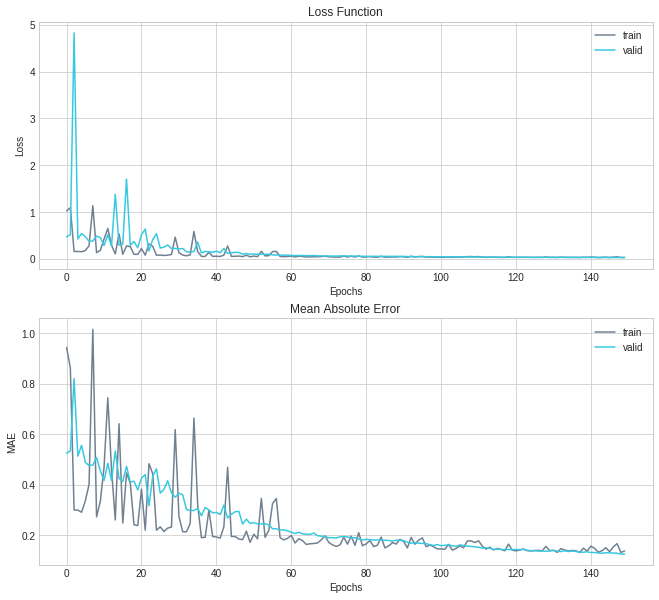

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric Features; 
Average Math Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.8637763476198611
EV score. Valid:  0.8476295995422539
EV score. Test:  0.8404296293690997
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.8614244723409602
R2 score. Valid:  0.8476243727516435
R2 score. Test:  0.8370353487621907
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.03020221083182043
MSE score. Valid:  0.02938642651812883
MSE score. Test:  0.03744415412071424
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.12761143693139382
MAE score. Valid:  0.13157446137876336
MAE score. Test:  0.1429171847552061
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.0968568801879881
MdAE score. Valid:  0.11446041107177729
MdAE score. Test:  0.10267539024353045


In [14]:
history_plot(history,50)
mlp_model1.load_weights(fw)
y_train_mlp1=mlp_model1.predict(X_train1)
y_valid_mlp1=mlp_model1.predict(X_valid1)
y_test_mlp1=mlp_model1.predict(X_test1)
ti='MLP; \nNumeric Features; \nAverage Math Proficiency'
scores(ti,y_train1,y_valid1,y_test1,
       y_train_mlp1,y_valid_mlp1,y_test_mlp1)

In [15]:
mlp_model2=mlp_model()
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model2.fit(X_train2,y_train2, 
                       epochs=200,batch_size=16,verbose=2,
                       validation_data=(X_valid2,y_valid2),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 1s - loss: 390401667.8630 - mean_absolute_error: 3381.9520 - val_loss: 10.7037 - val_mean_absolute_error: 3.1661

Epoch 00001: val_loss improved from inf to 10.70371, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 0s - loss: 6980.0656 - mean_absolute_error: 49.1714 - val_loss: 1.6925 - val_mean_absolute_error: 0.9586

Epoch 00002: val_loss improved from 10.70371 to 1.69251, saving model to weights.passnyc.hdf5
Epoch 3/200
 - 0s - loss: 373557.2074 - mean_absolute_error: 158.1027 - val_loss: 1026.6241 - val_mean_absolute_error: 29.8179

Epoch 00003: val_loss did not improve
Epoch 4/200
 - 0s - loss: 37333.5918 - mean_absolute_error: 77.2506 - val_loss: 221863.5726 - val_mean_absolute_error: 433.7528

Epoch 00004: val_loss did not improve
Epoch 5/200
 - 0s - loss: 6503.9166 - mean_absolute_error: 31.3829 - val_loss: 52.2302 - val_mean_absolute_error: 6.3241

Epoch 00005: val_loss did not improve
Epoch 6/200
 - 0s - loss: 

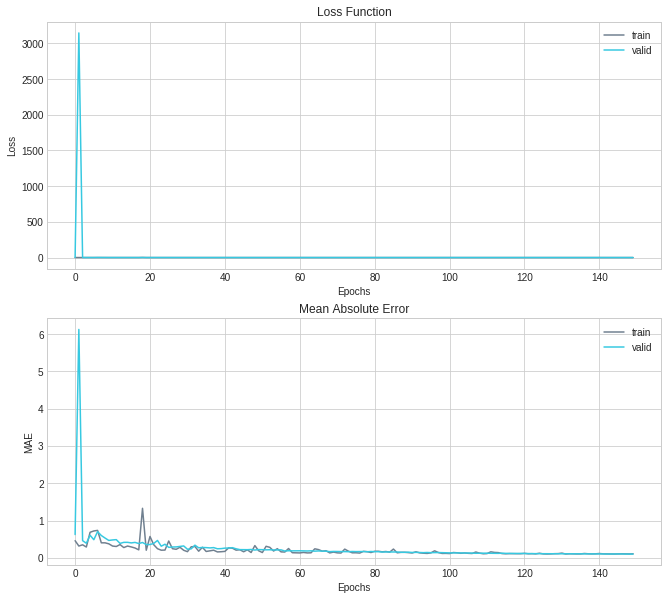

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric Features; 
Average ELA Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.8262531564814886
EV score. Valid:  0.8562644680572656
EV score. Test:  0.7452793525331143
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.8256993144245733
R2 score. Valid:  0.8561397193114917
R2 score. Test:  0.7452351562340871
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.021917276552911428
MSE score. Valid:  0.018014307167336683
MSE score. Test:  0.04090326653863452
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.10743591758080366
MAE score. Valid:  0.10194828681745553
MAE score. Test:  0.13683701794594527
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.08160761833190922
MdAE score. Valid:  0.08860546112060552
MdAE score. Test:  0.09296133041381838


In [16]:
history_plot(history,50)
mlp_model2.load_weights(fw)
y_train_mlp2=mlp_model2.predict(X_train2)
y_valid_mlp2=mlp_model2.predict(X_valid2)
y_test_mlp2=mlp_model2.predict(X_test2)
ti='MLP; \nNumeric Features; \nAverage ELA Proficiency'
scores(ti,y_train2,y_valid2,y_test2,
       y_train_mlp2,y_valid_mlp2,y_test_mlp2)

### MLP => Numeric & encoded categorical features

In [17]:
def cmlp_model():
    model=Sequential()    
    model.add(Dense(286,input_dim=286))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(286*4))
    model.add(LeakyReLU(alpha=.02))    
    model.add(Dense(286*16))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model3=cmlp_model()

In [18]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model3.fit(X_train3,y_train3, 
                       epochs=200,batch_size=16,verbose=2,
                       validation_data=(X_valid3,y_valid3),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 1s - loss: 134228305.9098 - mean_absolute_error: 1972.0305 - val_loss: 274666.6268 - val_mean_absolute_error: 483.7163

Epoch 00001: val_loss improved from inf to 274666.62685, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 0s - loss: 1467556.3243 - mean_absolute_error: 316.0667 - val_loss: 146.1830 - val_mean_absolute_error: 11.3956

Epoch 00002: val_loss improved from 274666.62685 to 146.18300, saving model to weights.passnyc.hdf5
Epoch 3/200
 - 0s - loss: 27637.6639 - mean_absolute_error: 91.0647 - val_loss: 1.7909 - val_mean_absolute_error: 0.9871

Epoch 00003: val_loss improved from 146.18300 to 1.79094, saving model to weights.passnyc.hdf5
Epoch 4/200
 - 0s - loss: 312368.9114 - mean_absolute_error: 184.6036 - val_loss: 22739.6850 - val_mean_absolute_error: 139.0652

Epoch 00004: val_loss did not improve
Epoch 5/200
 - 0s - loss: 8367.7704 - mean_absolute_error: 36.8510 - val_loss: 0.5578 - val_mean_absolute_error

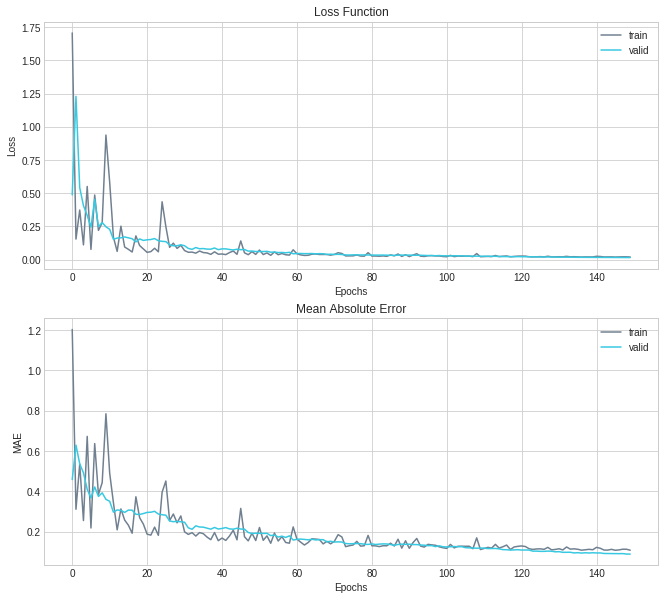

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric & Encoded Categorical Features; 
Average Math Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.9283346752398376
EV score. Valid:  0.8978312039782783
EV score. Test:  0.8658658170143037
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9280126331861107
R2 score. Valid:  0.895496949353012
R2 score. Test:  0.8653697728470853
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.01568947754678708
MSE score. Valid:  0.02015395292681973
MSE score. Test:  0.03093379414818101
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.0876123360015259
MAE score. Valid:  0.10772757666630381
MAE score. Test:  0.13155686516314746
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.06297835350036607
MdAE score. Valid:  0.08089926719665508
MdAE score. Test:  0.10512560844

In [19]:
history_plot(history,50)
mlp_model3.load_weights(fw)
y_train_mlp3=mlp_model3.predict(X_train3)
y_valid_mlp3=mlp_model3.predict(X_valid3)
y_test_mlp3=mlp_model3.predict(X_test3)
ti='MLP; \nNumeric & Encoded Categorical Features; \nAverage Math Proficiency'
scores(ti,y_train3,y_valid3,y_test3,
       y_train_mlp3,y_valid_mlp3,y_test_mlp3)

In [20]:
mlp_model4=cmlp_model()
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model4.fit(X_train4,y_train4, 
                       epochs=200,batch_size=16,verbose=2,
                       validation_data=(X_valid4,y_valid4),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 1s - loss: 231840076.3270 - mean_absolute_error: 2634.5744 - val_loss: 90.6874 - val_mean_absolute_error: 8.7185

Epoch 00001: val_loss improved from inf to 90.68740, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 0s - loss: 104481.7790 - mean_absolute_error: 146.1880 - val_loss: 601.9094 - val_mean_absolute_error: 22.6773

Epoch 00002: val_loss did not improve
Epoch 3/200
 - 0s - loss: 2415457.2849 - mean_absolute_error: 332.7045 - val_loss: 7.2257 - val_mean_absolute_error: 2.2015

Epoch 00003: val_loss improved from 90.68740 to 7.22573, saving model to weights.passnyc.hdf5
Epoch 4/200
 - 0s - loss: 20681.3490 - mean_absolute_error: 67.8457 - val_loss: 0.3509 - val_mean_absolute_error: 0.5039

Epoch 00004: val_loss improved from 7.22573 to 0.35088, saving model to weights.passnyc.hdf5
Epoch 5/200
 - 0s - loss: 582433.2862 - mean_absolute_error: 191.1978 - val_loss: 239.5752 - val_mean_absolute_error: 14.5217

Epoch 00

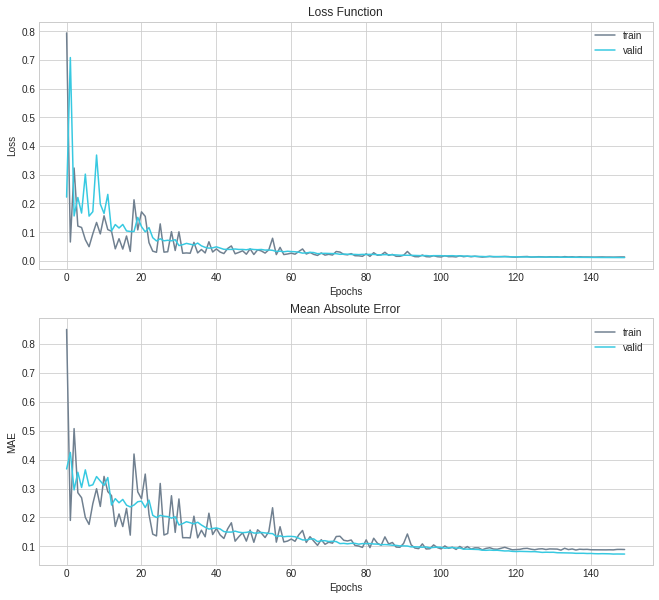

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric & Encoded Categorical Features; 
Average ELA Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.8999664850995961
EV score. Valid:  0.9007447294879483
EV score. Test:  0.8290292777822567
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.8994553166941484
R2 score. Valid:  0.9007394758415702
R2 score. Test:  0.8288240241859752
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.012642897087089393
MSE score. Valid:  0.012429487577967956
MSE score. Test:  0.027482820864268398
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.07964930918364398
MAE score. Valid:  0.08907048152813447
MAE score. Test:  0.11388898137956859
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.05813501358032225
MdAE score. Valid:  0.07921419143676767
MdAE score. Test:  0.0798021

In [21]:
history_plot(history,50)
mlp_model4.load_weights(fw)
y_train_mlp4=mlp_model4.predict(X_train4)
y_valid_mlp4=mlp_model4.predict(X_valid4)
y_test_mlp4=mlp_model4.predict(X_test4)
ti='MLP; \nNumeric & Encoded Categorical Features; \nAverage ELA Proficiency'
scores(ti,y_train4,y_valid4,y_test4,
       y_train_mlp4,y_valid_mlp4,y_test_mlp4)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Predictions & Real Data</h1>
### Numeric features

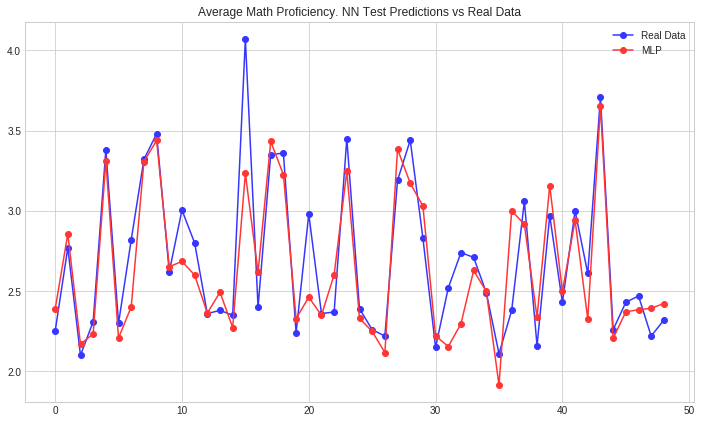

In [22]:
plt.figure(figsize=(12,7))
plt.plot(y_test1[1:50],'-o',color='#3636ff',label='Real Data')
plt.plot(y_test_mlp1[1:50],'-o',color='#ff3636',label='MLP')
ti="Average Math Proficiency. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

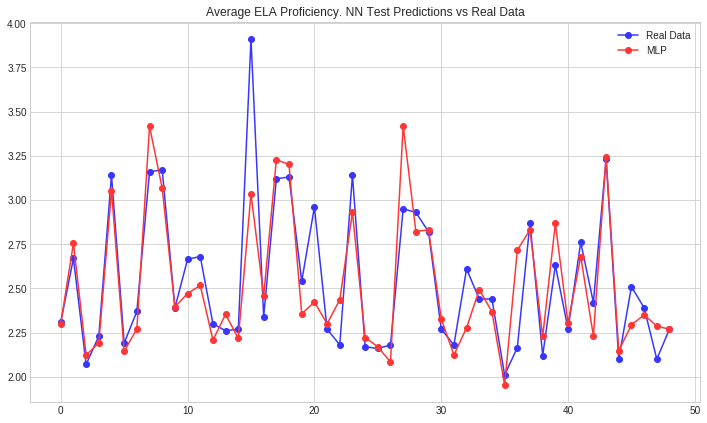

In [23]:
plt.figure(figsize=(12,7))
plt.plot(y_test2[1:50],'-o',color='#3636ff',label='Real Data')
plt.plot(y_test_mlp2[1:50],'-o',color='#ff3636',label='MLP')
ti="Average ELA Proficiency. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

### Numeric & encoded categorical features

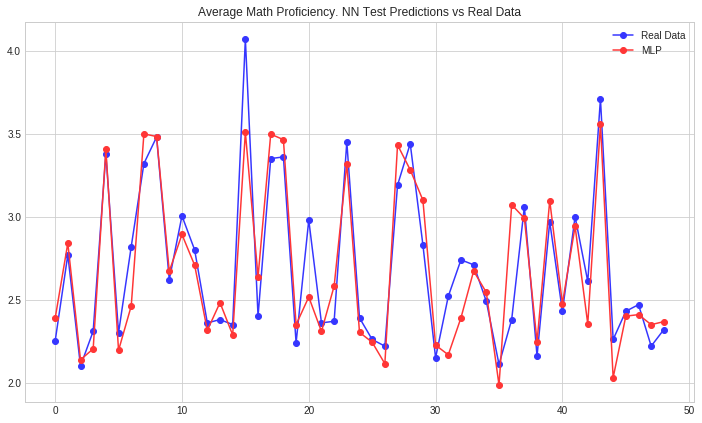

In [24]:
plt.figure(figsize=(12,7))
plt.plot(y_test3[1:50],'-o',color='#3636ff',label='Real Data')
plt.plot(y_test_mlp3[1:50],'-o',color='#ff3636',label='MLP')
ti="Average Math Proficiency. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

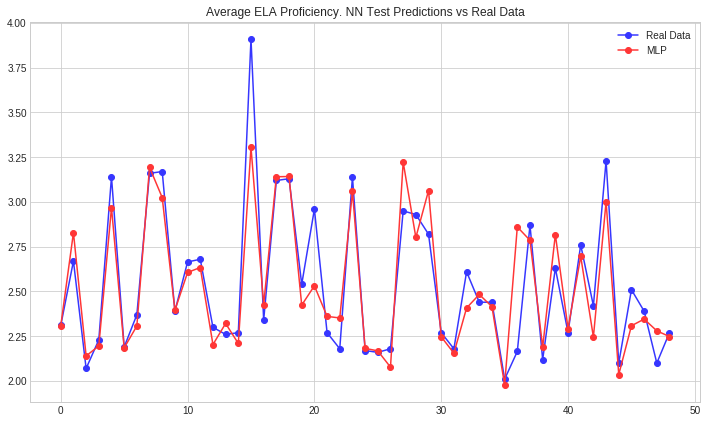

In [25]:
plt.figure(figsize=(12,7))
plt.plot(y_test4[1:50],'-o',color='#3636ff',label='Real Data')
plt.plot(y_test_mlp4[1:50],'-o',color='#ff3636',label='MLP')
ti="Average ELA Proficiency. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

In this case, neural networks were used to predict the indicators of educational outcomes. 

It is difficult to achieve high accuracy here in general since the ultimate goal depends not only on the financing, social environment and professionalism of the staff but also on the personal qualities of the students. 

Adding category variables does not improve the accuracy of predictions because these indicators depend not exactly on geolocations but on the well-being of the surrounding area.

I believe that it is possible to reach at least the same accuracy with neural networks as with regression algorithms like `Gradient Boosting` or `Random Forest`.

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>&#x1F310; &nbsp; Let's Go Ahead</h1>
It's time to move to the next step.

&#x1F4D8; &nbsp; [PASSNYC. 32 School Districts and D5. Part 2](https://www.kaggle.com/olgabelitskaya/passnyc-32-school-districts-and-d5-part-2)